In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm

errors = pd.read_table('errors.csv',delimiter =';')
errors

,Crude,Density,Sulphur,Error type,Error
0,Bonny light,light,Sweet,Linear scaled MSE,0.687899
1,Bonny light,light,Sweet,Non.linear scaled MSE,0.625342
2,Bonny light,light,Sweet,RF scaled MSE,0.570203
3,Bonny light,light,Sweet,MD scaled MSE,0.948077
4,Maya USGC,Heavy,Sour,Linear scaled MSE,0.949291
5,Maya USGC,Heavy,Sour,Non.linear scaled MSE,0.754065
6,Maya USGC,Heavy,Sour,RF scaled MSE,0.901503
7,Maya USGC,Heavy,Sour,MD scaled MSE,0.718706
8,BTC Azeri,light,Sweet,Linear scaled MSE,0.279927
9,BTC Azeri,light,Sweet,Non.linear scaled MSE,1.000000


In [3]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


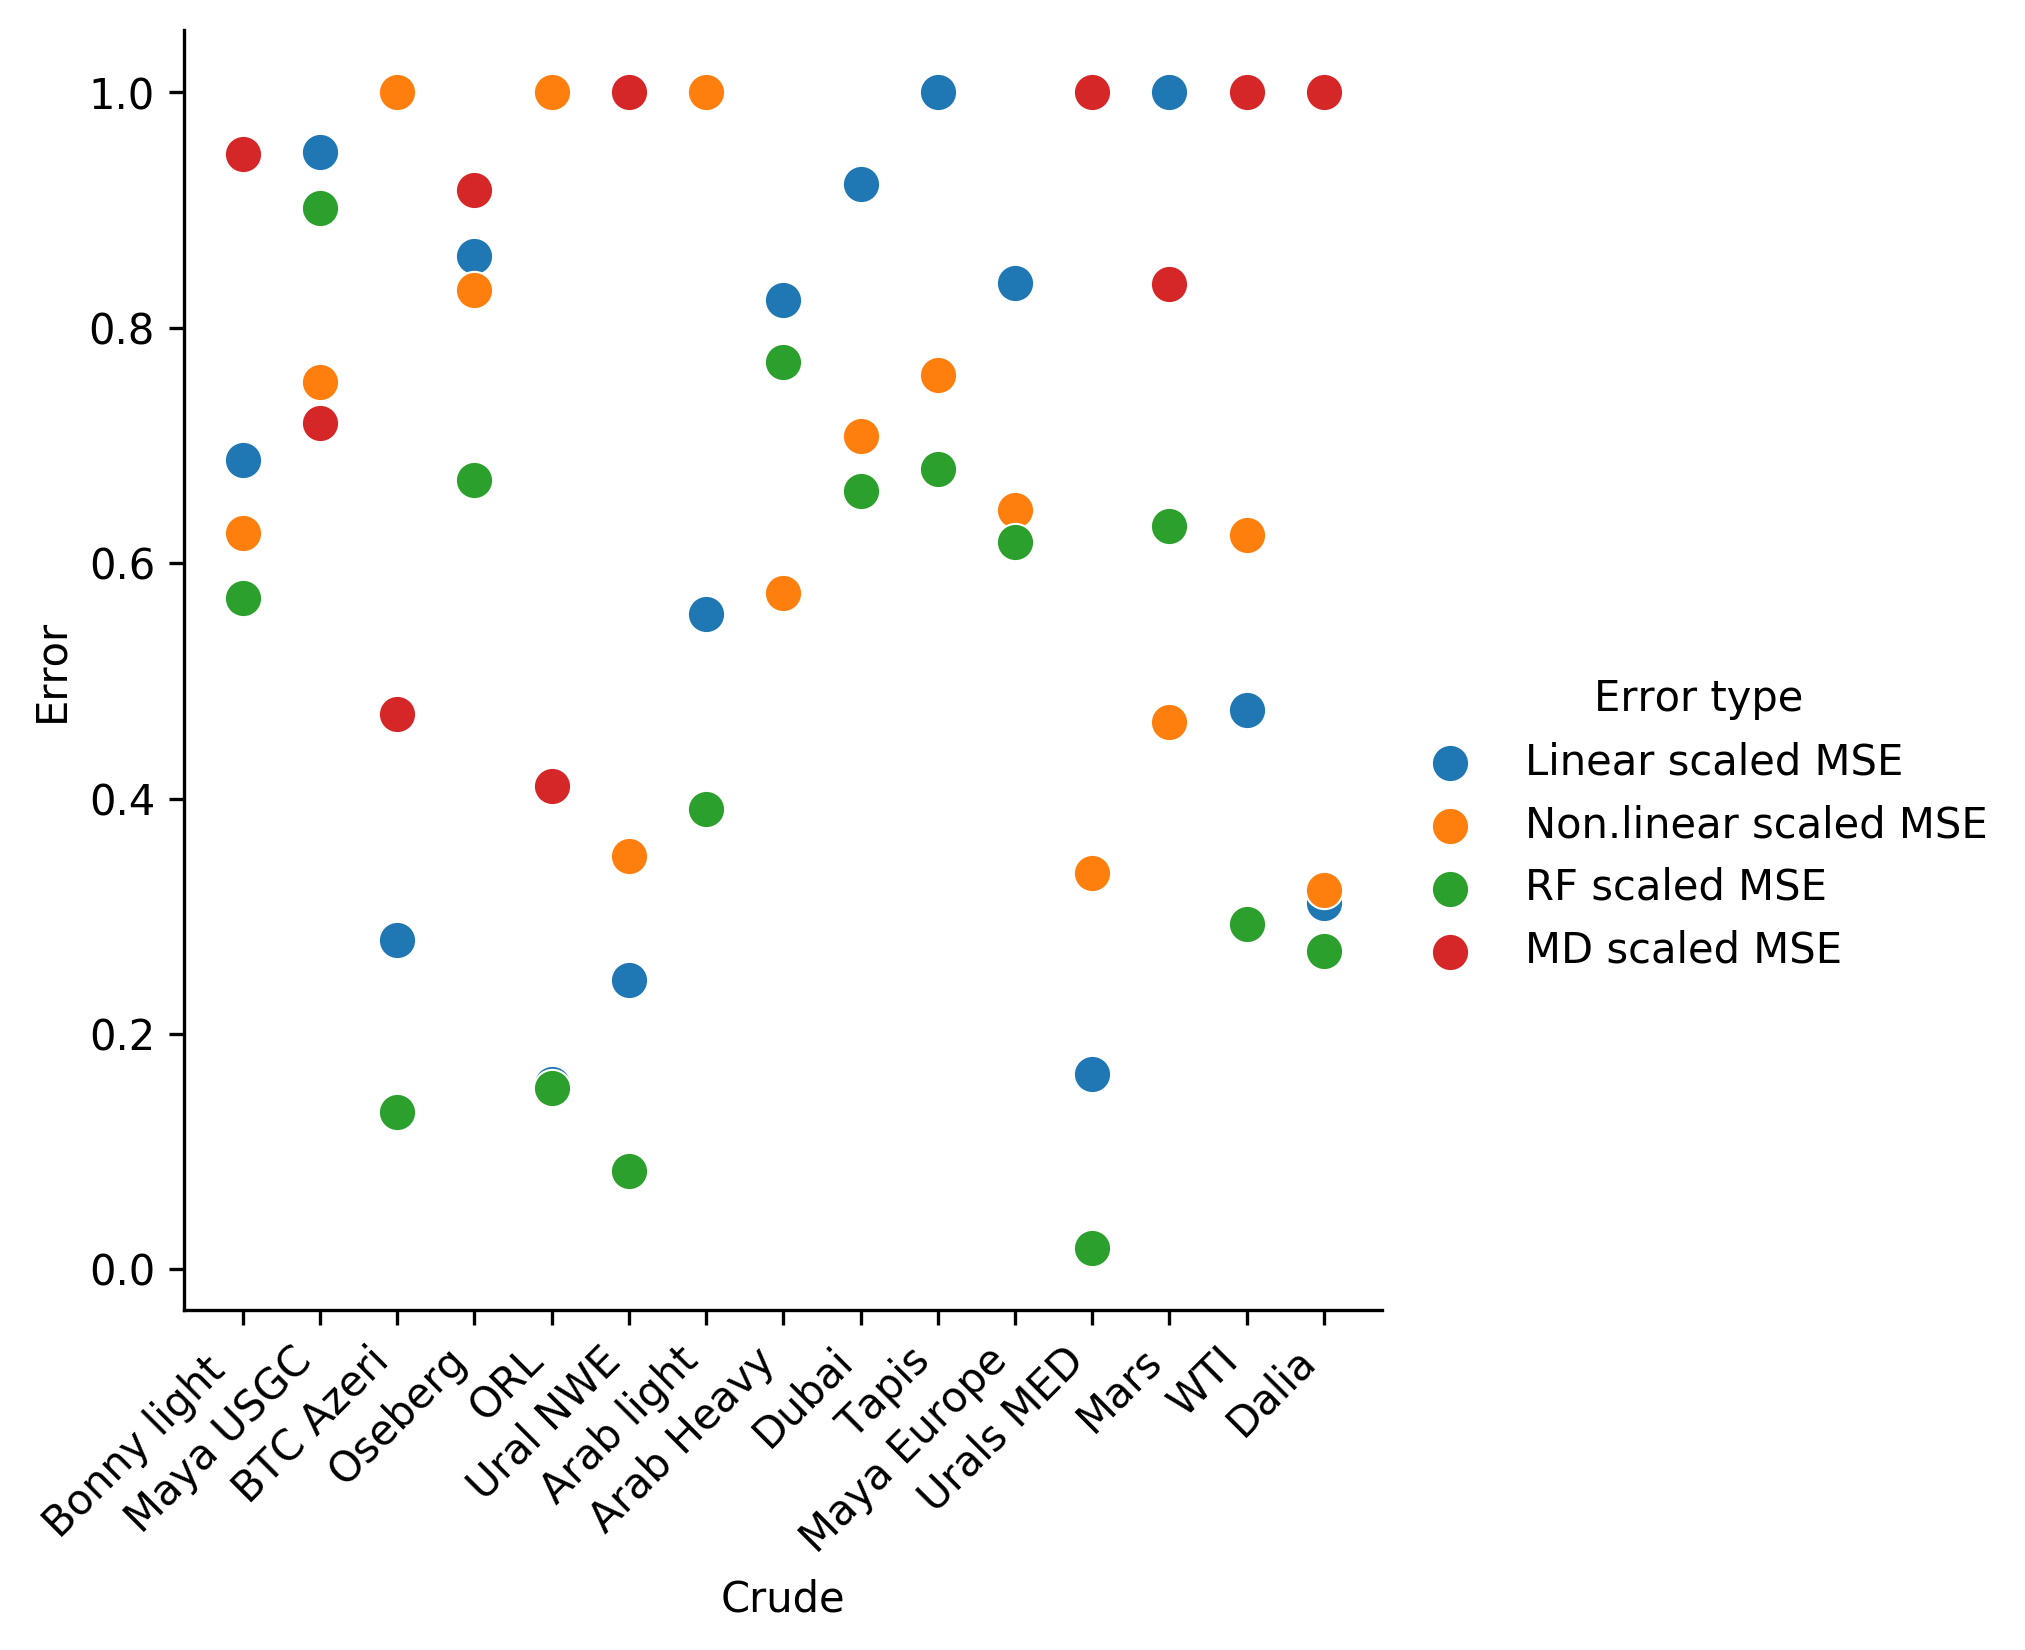

In [4]:
plt.rcParams['figure.dpi'] = 300

g = sns.FacetGrid(errors, hue="Error type",  height=5 )
g.map(plt.scatter, "Crude", "Error", s=80, linewidth=.5, edgecolor="white")
g.set_xticklabels(rotation = 45,horizontalalignment='right')
g.add_legend();




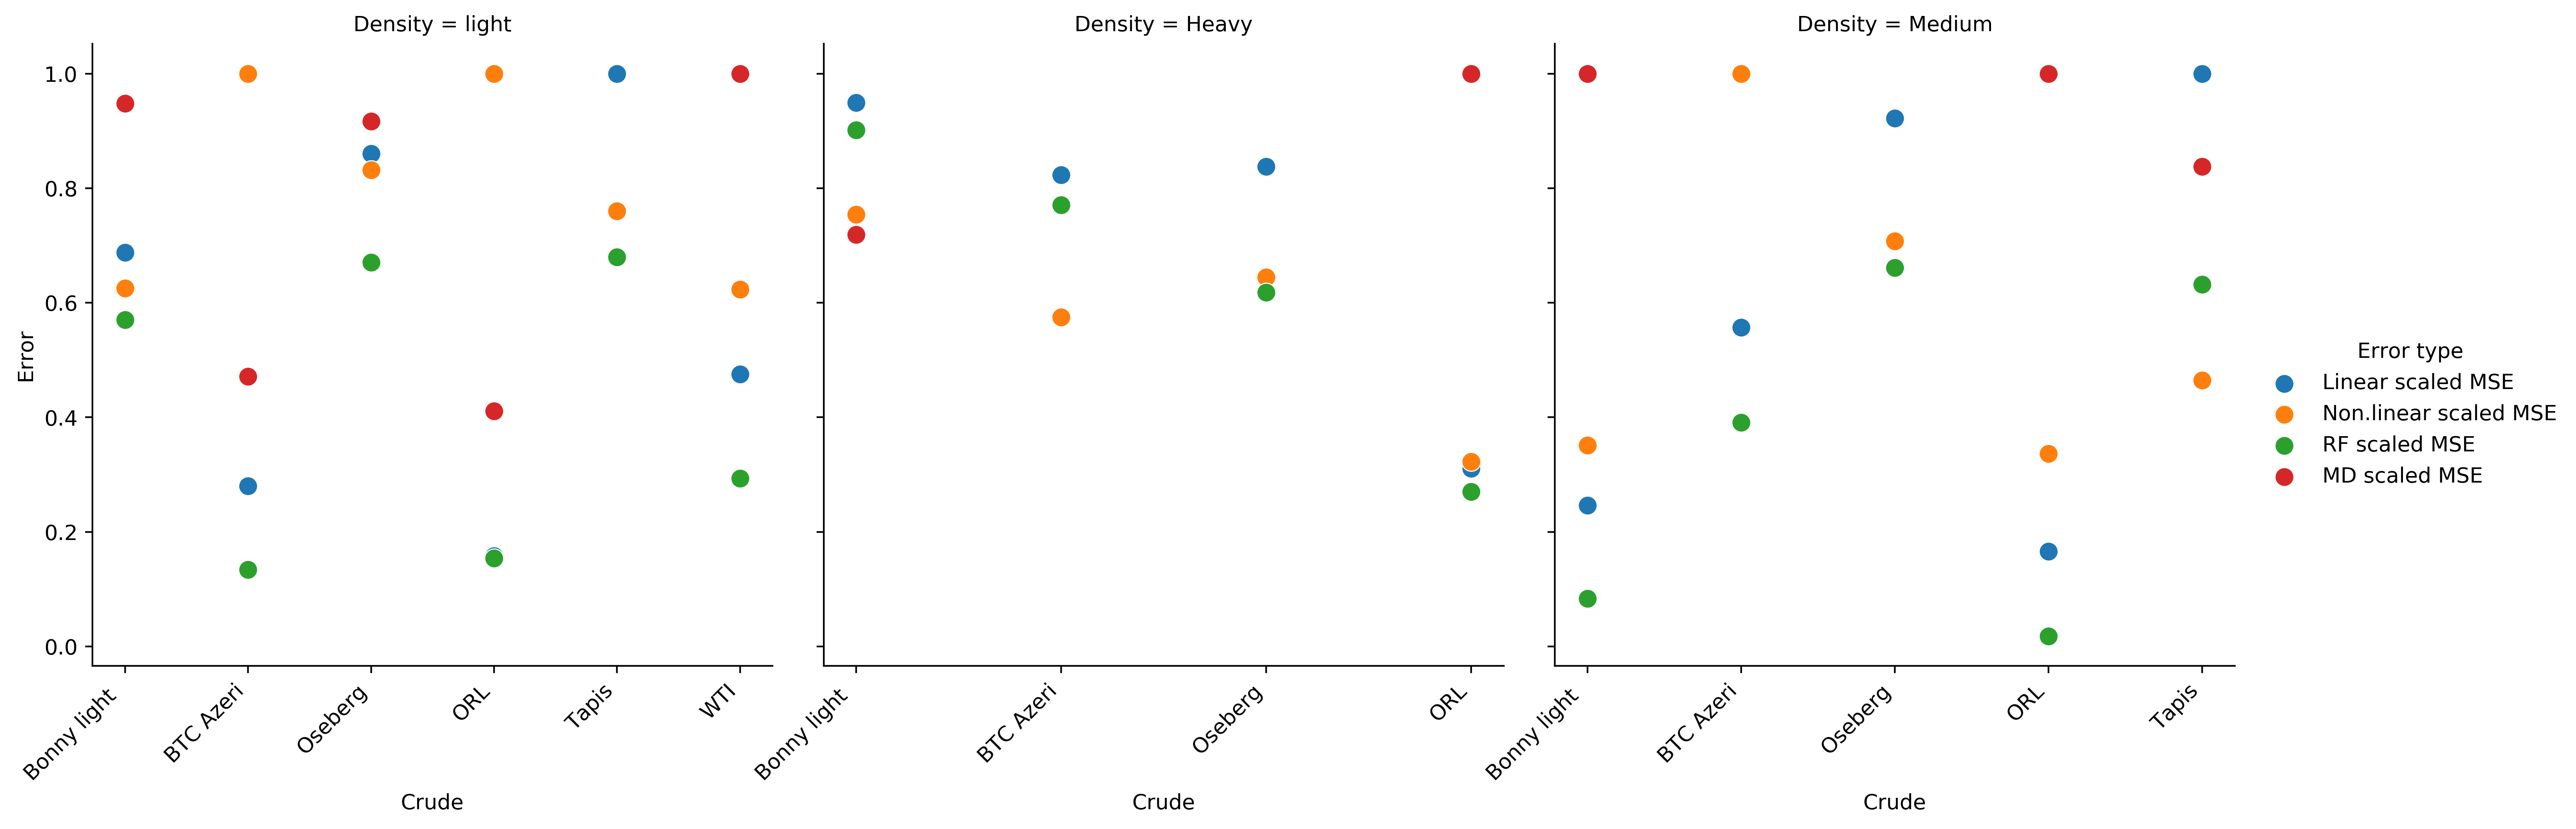

In [5]:
plt.rcParams['figure.dpi'] = 400
g = sns.FacetGrid(errors, hue="Error type",  height=5 , col="Density",sharex =False)
g = (g.map(plt.scatter, "Crude", "Error", s=80, linewidth=.5, edgecolor="white").add_legend())

g.set_xticklabels(rotation = 45,horizontalalignment='right')

#g.axes[0,0].set_xlabel('crude')
plt.show()

[Text(0, 0, 'Bonny light '),
 Text(0, 0, 'Maya USGC'),
 Text(0, 0, 'BTC Azeri'),
 Text(0, 0, 'Oseberg'),
 Text(0, 0, 'ORL'),
 Text(0, 0, 'Ural NWE'),
 Text(0, 0, 'Arab light'),
 Text(0, 0, 'Arab Heavy'),
 Text(0, 0, 'Dubai'),
 Text(0, 0, 'Tapis'),
 Text(0, 0, 'Maya Europe'),
 Text(0, 0, 'Urals MED'),
 Text(0, 0, 'Mars'),
 Text(0, 0, 'WTI'),
 Text(0, 0, 'Dalia')]

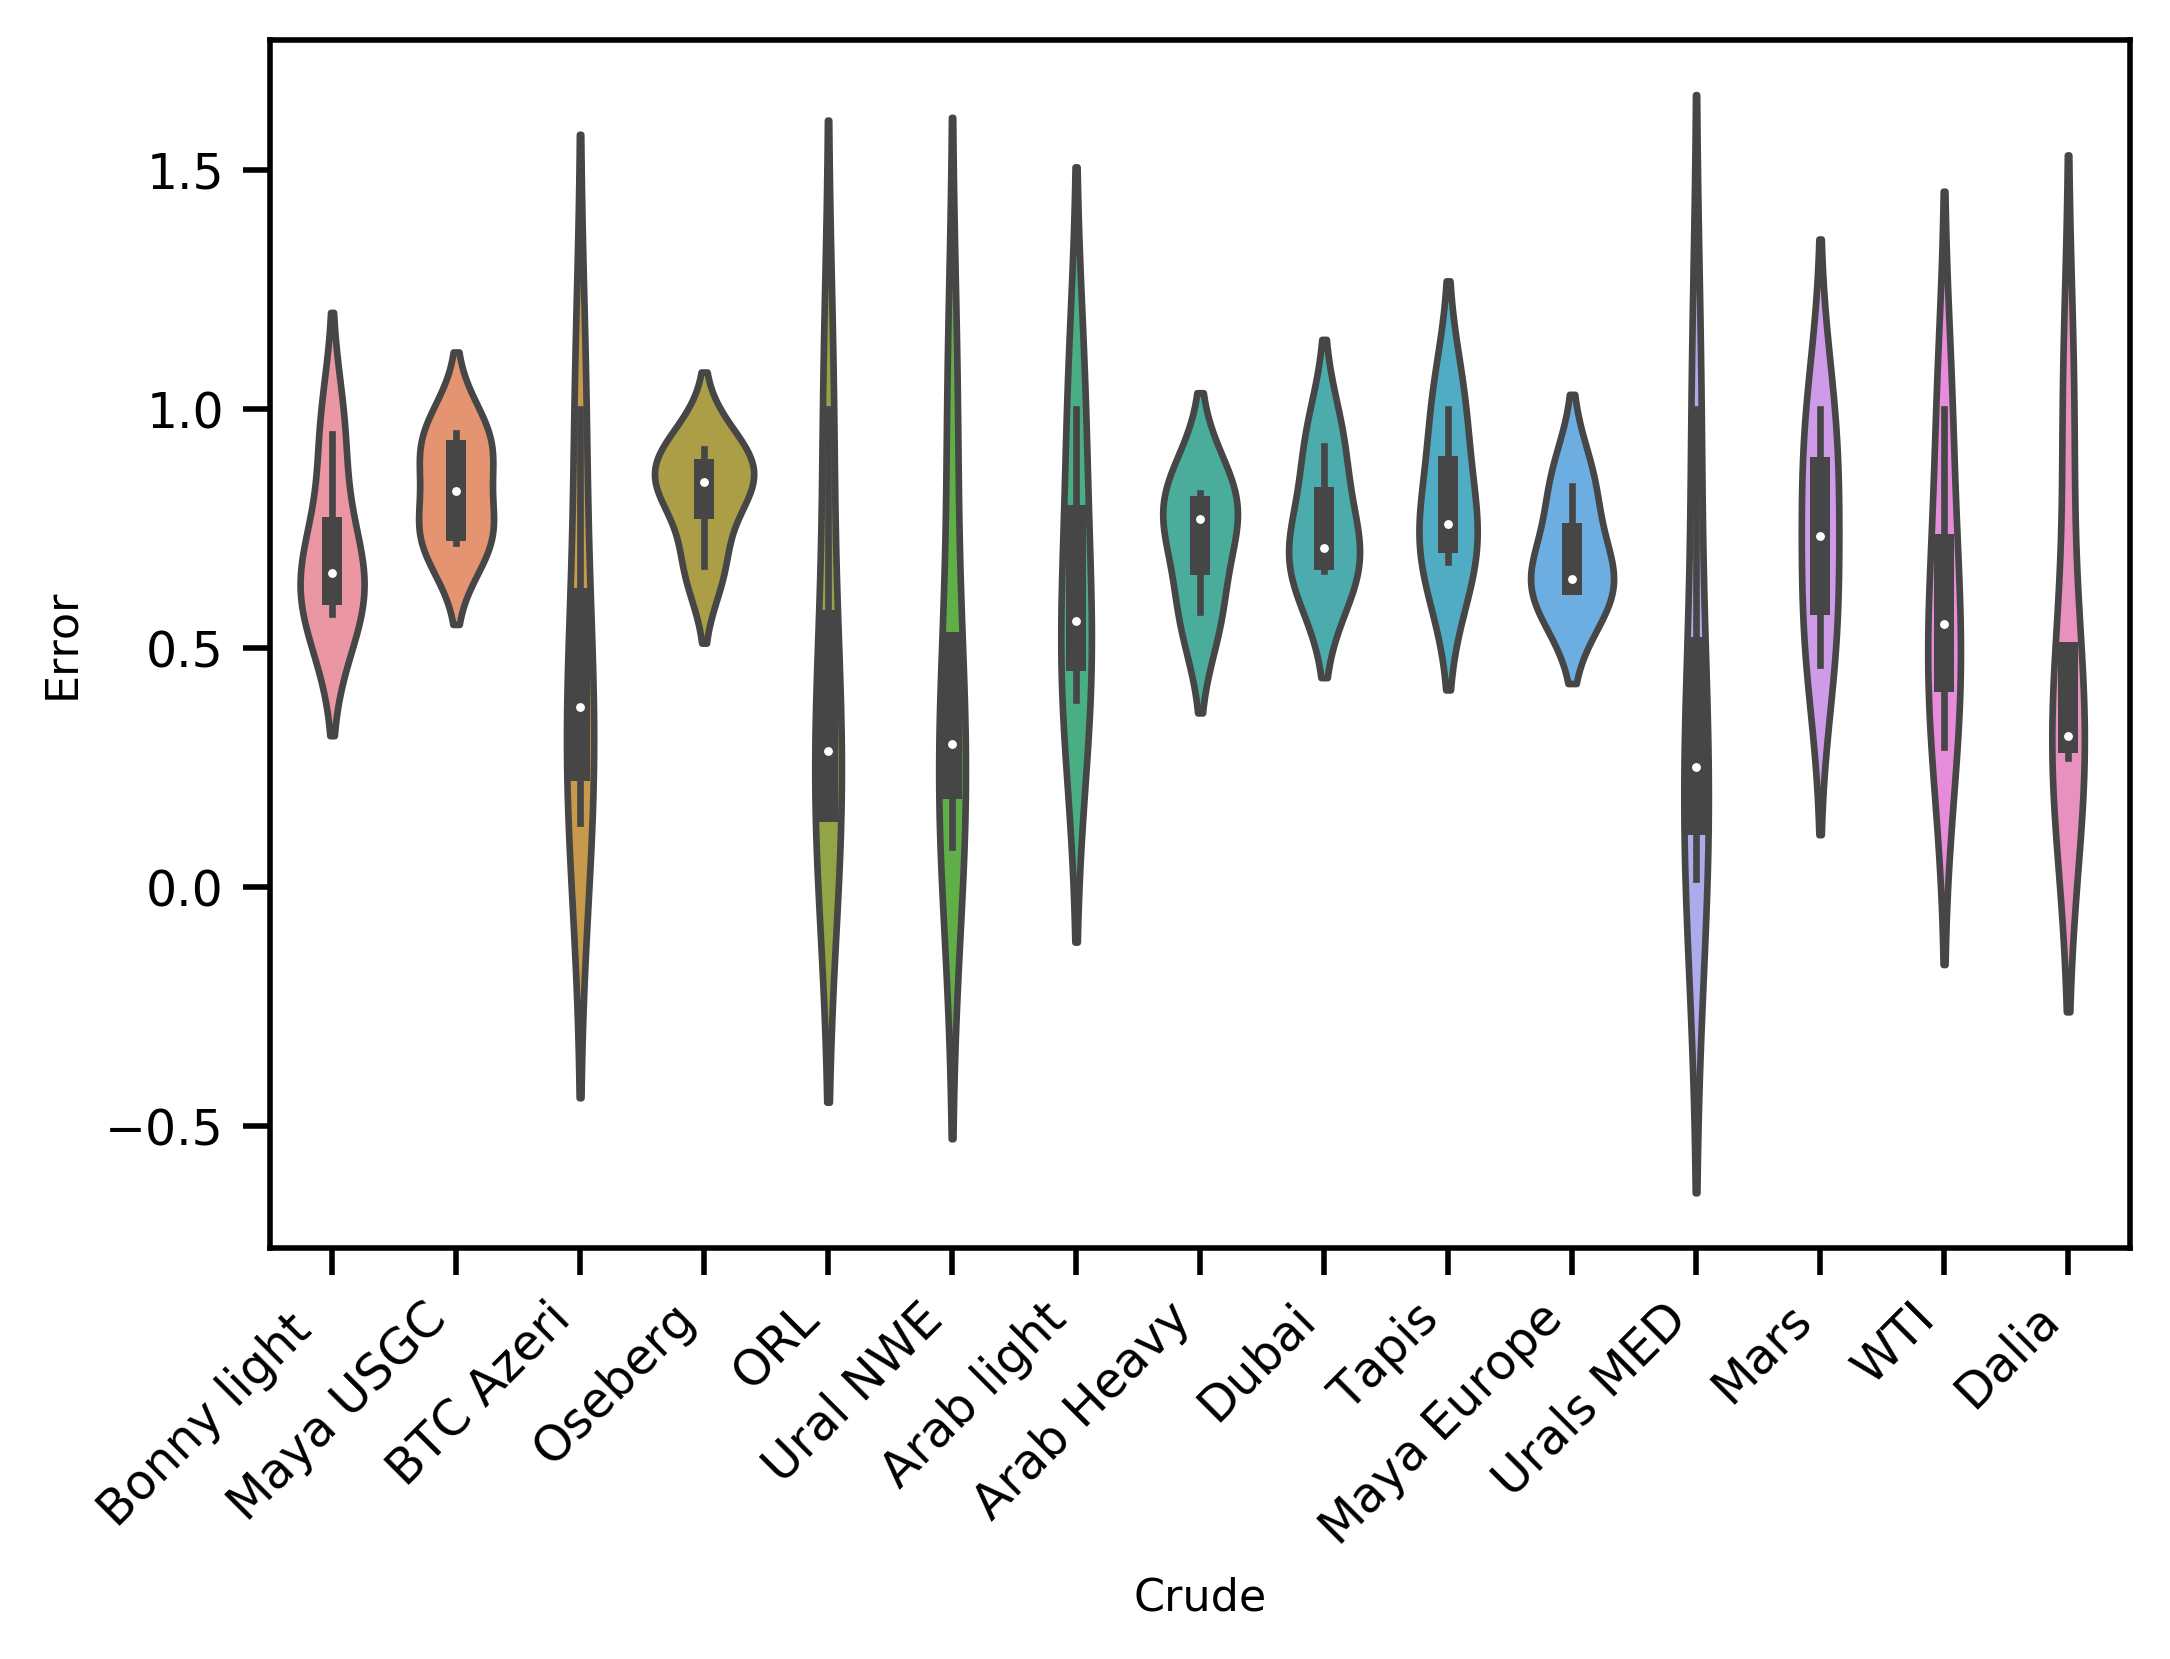

In [10]:
h =sns.violinplot(y="Error",x = "Crude",splot = True,data =errors)
h.set_xticklabels(h.get_xticklabels(),rotation = 45,horizontalalignment='right')

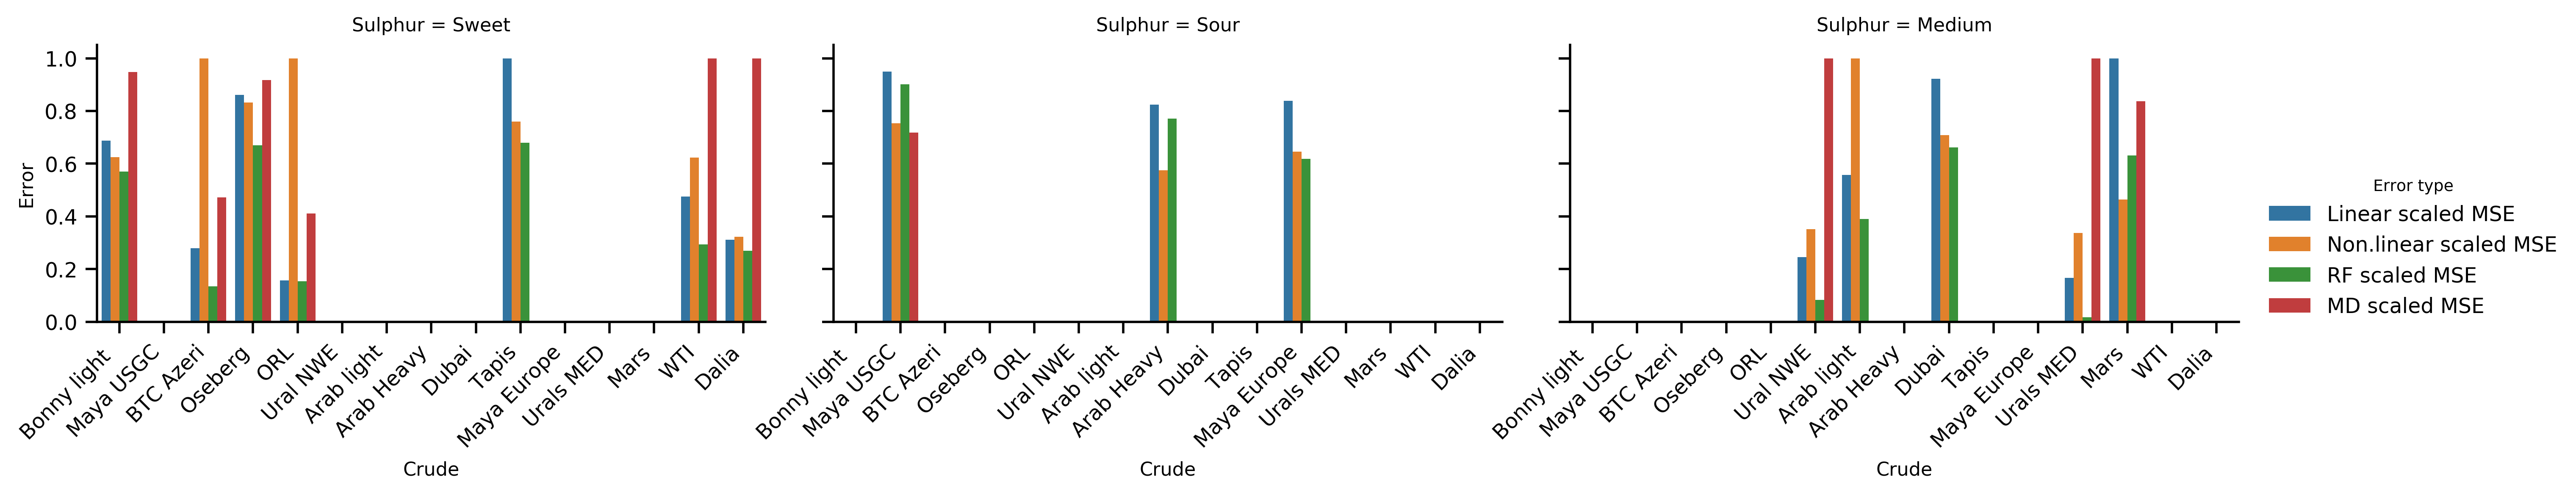

In [8]:

sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})   
g = sns.catplot(x="Crude", y="Error",hue="Error type",col ="Sulphur",data=errors, kind="bar",height=2.5,aspect = 1.8);
g.set_xticklabels(rotation = 45,horizontalalignment='right')



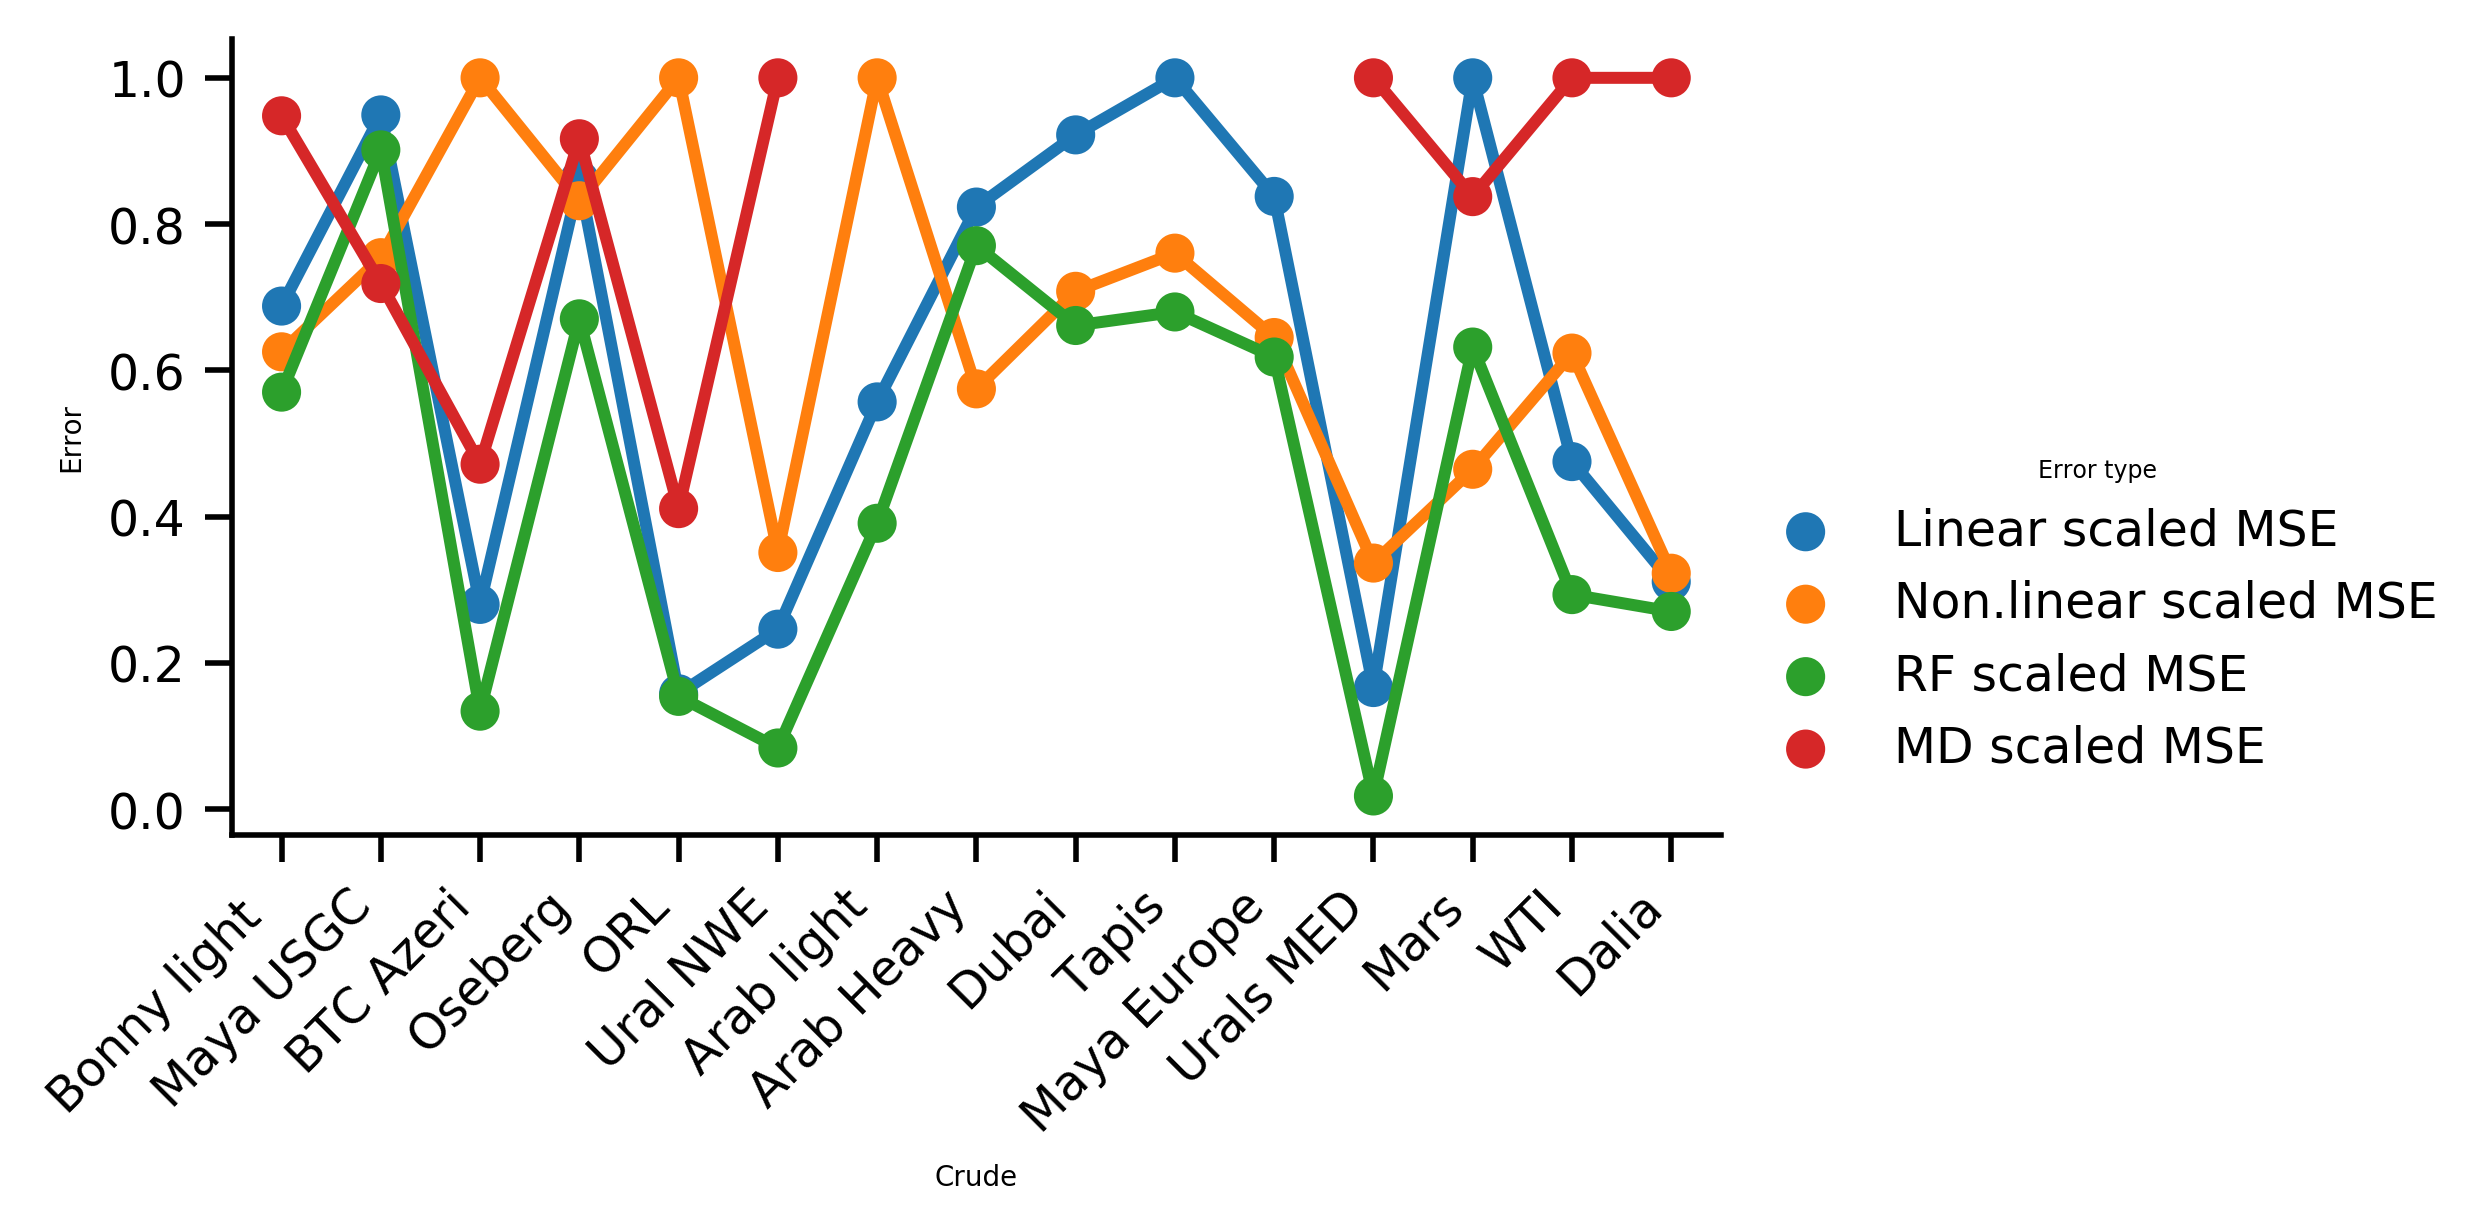

In [20]:
sns.set_context("paper", rc={"font.size":5,"axes.titlesize":8,"axes.labelsize":5}) 
g = sns.catplot(x="Crude", y="Error",hue="Error type",data=errors, kind="point",height=2.5,aspect = 1.8);
g.set_xticklabels(rotation = 45,horizontalalignment='right')